### Fill in the TODO section of the notebook.

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

#### You are given an image database *images_color_se*, which contains multiple images of different views and colors. Get the names of all images in the folder *images_color_se*.

In [6]:
# Loading all Images Name list Here
base_dir = 'images_color_se/'
# Putting List of all images in the directory
db_images_path_list = [base_dir + str(images) for images in os.listdir(base_dir) if images.endswith('.jpg')]
print("Number of images in the directory is ", len(db_images_path_list))

Number of images in the directory is  122


#### TODO: In the following section read all images in RGB and HSV format. Resize all images to one size before reading. Keep the size to be small to make your algorithm run faster.

In [30]:
# In this section we read all images in RGB and HSV format and store it the list

rgb_images_list = []
hsv_images_list = []

#cv2.imread (as bgr), resize to 64x64, convert to rgb

for image in db_images_path_list:
#     bgr_images_list.append(cv2.imread(str(image)))
    read_image = cv2.imread(str(image))
    read_image = cv2.resize(read_image, [64,64])
    rgb_images_list.append(cv2.cvtColor(read_image, cv2.COLOR_BGR2RGB))
    hsv_images_list.append(cv2.cvtColor(read_image, cv2.COLOR_BGR2HSV))

print("Length of RGB images = ", len(rgb_images_list))
print("Length of HSV images = ", len(hsv_images_list))

Length of RGB images =  122
Length of HSV images =  122


#### Here we visualize some images of present in *images_color_se*

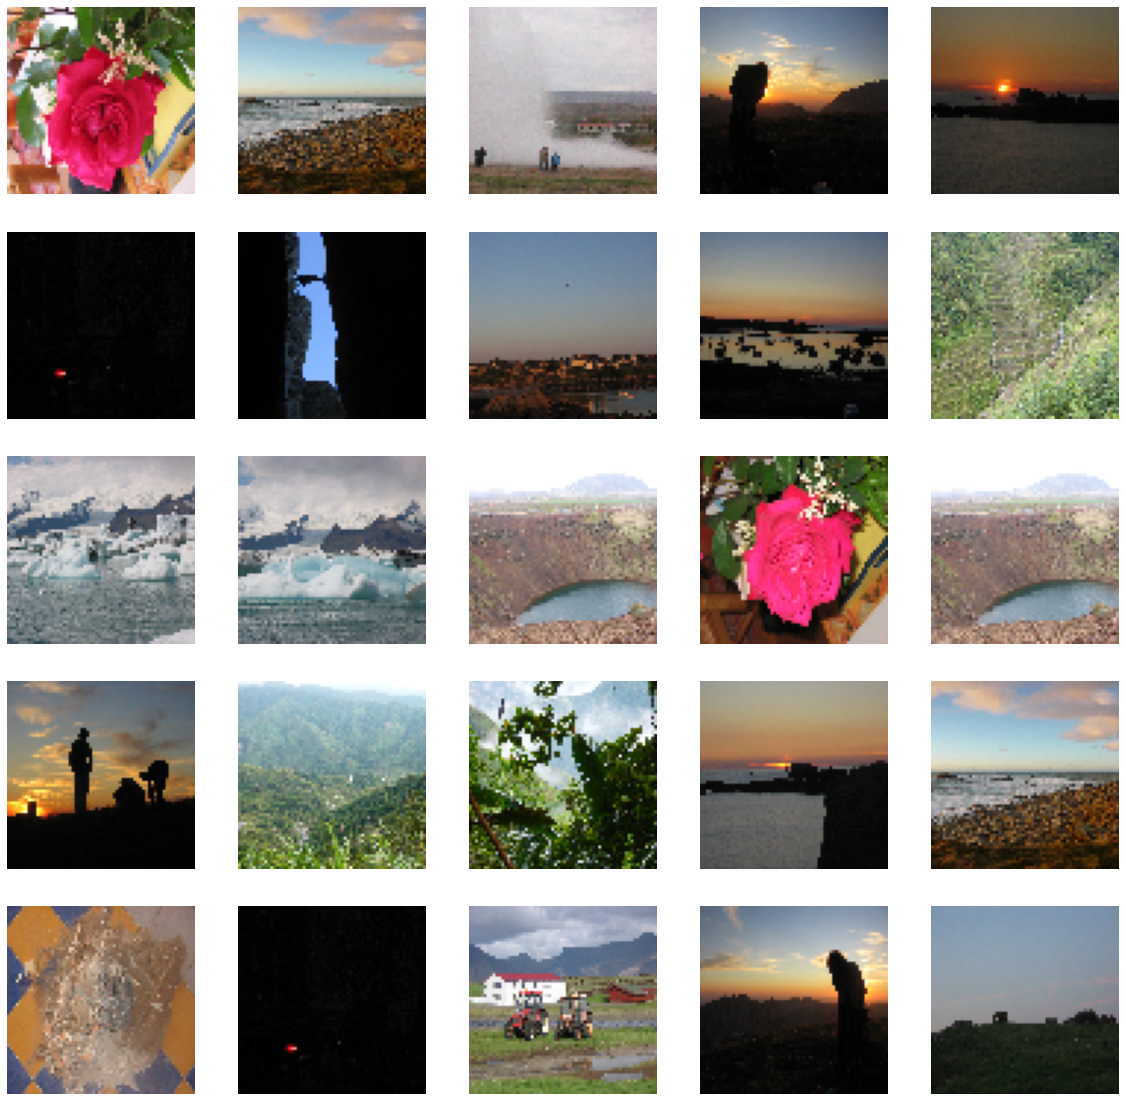

In [31]:
fig = plt.figure(figsize=(20, 20))

row_col = 5

for i in range(row_col):
    for j in range(row_col):
        index = (i * row_col) +  j
        plt.subplot(row_col, row_col, index + 1)
        random_index = np.random.randint(0, len(rgb_images_list))
        plt.imshow(rgb_images_list[random_index])
        plt.axis("off")

#### TODO: Write a function *compute_matching_score* which takes as input an query image and its format (which is one of {'rgb', 'hsv'}) and returns all other images histogram matching score to the query image

In [54]:
def get_hist (query_img):
    histr = cv2.calcHist(query_img, [0], None, [256], [0,256])
    cv2.normalize(histr, histr)
    return histr

def compute_matching_score(img, img_format):
    # Compares histogram of one image with histogram of all other images and return list of all matching scores
    # For HSV, only need to get histogram of hue value (0th channel)
        
    score_list = []
    
    if img_format == 'rgb':
        image_list = rgb_images_list
        img_hist0 = get_hist(img[:,:,0])
        img_hist1 = get_hist(img[:,:,1])
        img_hist2 = get_hist(img[:,:,2])

    elif img_format == 'hsv':
        image_list = rgb_images_list
        img_hist0 = get_hist(img[:,:,0])
    
    for image in image_list:
        score = 0
        hist0 = get_hist(image[:,:,0])
        score += cv2.compareHist(img_hist0, hist0, cv2.HISTCMP_INTERSECT)

        if img_format == 'rgb':
            hist1 = get_hist(image[:,:,1])
            hist2 = get_hist(image[:,:,2])
            score += cv2.compareHist(img_hist1, hist1, cv2.HISTCMP_INTERSECT)
            score += cv2.compareHist(img_hist2, hist2, cv2.HISTCMP_INTERSECT)
            score = score/3
            
        score_list.append([image, score])
    return score_list
        
        
        

    

#### In this section we generate a random index of query image. Call *compute_matching_score* for query image with image format 'rgb' to get all other images histogram matching scores. Then we visualize top 5 best matching images.

<class 'numpy.ndarray'>


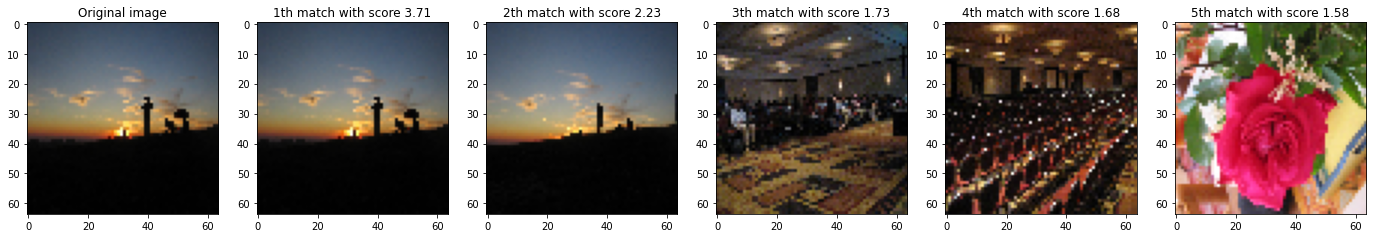

In [60]:
print(type(rgb_images_list[0]))
query_image_index = np.random.randint(low=0, high=len(rgb_images_list))
query_image = rgb_images_list[query_image_index] # 61

match_scores = compute_matching_score(query_image, 'rgb')
# match_scores = compute_matching_score(query_image, 'hsv')
match_scores.sort(reverse=True, key=lambda x : x[1])

plt.figure(figsize=(24, 10))
plt.subplot(1, 6, 1)
plt.imshow(query_image)
plt.title('Original image')

for i, match in enumerate(match_scores[:5]):
    rgb_img, score = match
    plt.subplot(1, 6, i + 2)
    plt.imshow(rgb_img)
    plt.title('%dth match with score %.2f'%(i + 1, score))

#### Call *compute_matching_score* for the same query image with image format 'hsv' to get all other images histogram matching scores. Then we visualize top 5 best matching images.

It is equal


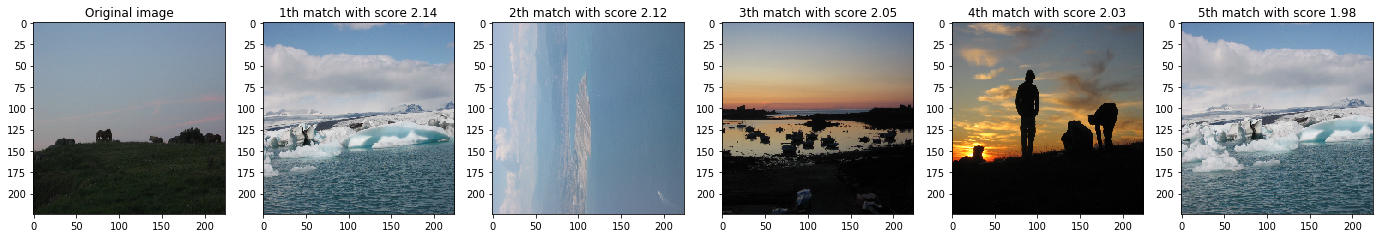

In [11]:
query_image = hsv_images_list[query_image_index]    # 61

match_scores = compute_matching_score(query_image, 'hsv')
match_scores.sort(reverse=True, key=lambda x : x[1])

plt.figure(figsize=(24, 10))
plt.subplot(1,6,1)
plt.imshow(rgb_images_list[num_image]) # Converting BGR to RGB before displaying the images
plt.title('Original image')

for i, match in enumerate(match_scores[:5]):
    rgb_img, score = match
    plt.subplot(1,6,i+2)
    plt.imshow(rgb_img)
    plt.title('%dth match with score %.2f'%(i+1,score))